In [ ]:
import numpy as np
import pandas as pd
import os
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy.stats import mode

In [ ]:
dir_files = os.listdir("/content/drive/MyDrive/combined_data")
subs='user01'
user01_files = list(filter(lambda x: subs in x, dir_files))
user01_files

['user01_2020-08-31.csv',
 'user01_2020-09-05.csv',
 'user01_2020-09-07.csv',
 'user01_2020-09-08.csv',
 'user01_2020-09-09.csv',
 'user01_2020-09-12.csv',
 'user01_2020-09-13.csv',
 'user01_2020-09-14.csv',
 'user01_2020-09-15.csv',
 'user01_2020-09-17.csv',
 'user01_2020-09-18.csv',
 'user01_2020-09-19.csv',
 'user01_2020-09-20.csv',
 'user01_2020-09-21.csv',
 'user01_2020-09-22.csv',
 'user01_2020-09-23.csv',
 'user01_2020-09-25.csv',
 'user01_2020-09-26.csv',
 'user01_2020-09-27.csv']

In [ ]:
df_list = []
for file in user01_files:
  df = pd.read_csv("/content/drive/MyDrive/combined_data/"+file)
  df_list.append(df)
df_user01 = pd.concat(df_list, ignore_index=True)

In [ ]:
df_user01['action'].unique()

array(['household', 'travel', 'personal_care', 'meal', 'recreation_media',
       'work', 'study', 'recreation_etc', 'socialising', 'hobby', 'shop',
       'entertainment', 'sleep', 'outdoor_act', 'community_interaction'],
      dtype=object)

In [ ]:
df_user01['action'].value_counts()

action
travel                   118585
recreation_media         100143
work                      81141
meal                      69058
personal_care             25470
household                 24762
hobby                     21959
study                     19543
recreation_etc            19066
sleep                      8886
shop                       8289
socialising                5304
outdoor_act                2077
community_interaction      1940
entertainment               136
Name: count, dtype: int64

In [ ]:
df_user01.columns

Index(['timestamp', 'mAcc_x', 'mAcc_y', 'mAcc_z', 'mMag_x', 'mMag_y', 'mMag_z',
       'mGyr_x', 'mGyr_y', 'mGyr_z', 'mGyr_roll', 'mGyr_pitch', 'mGyr_yaw',
       'mGps_lat', 'mGps_lon', 'e4Acc_x', 'e4Acc_y', 'e4Acc_z', 'e4Bvp_val',
       'e4Temp_val', 'e4Hr_val', 'e4Eda_val', 'action', 'date_time', 'date',
       'time'],
      dtype='object')

In [ ]:
df = df_user01[['timestamp','mAcc_x', 'mAcc_y', 'mAcc_z', 'mMag_x', 'mMag_y', 'mMag_z',
       'mGyr_x', 'mGyr_y', 'mGyr_z', 'mGyr_roll', 'mGyr_pitch', 'mGyr_yaw',
       'mGps_lat', 'mGps_lon', 'e4Acc_x', 'e4Acc_y', 'e4Acc_z', 'e4Bvp_val',
       'e4Temp_val', 'e4Hr_val', 'e4Eda_val', 'time', 'action']]
df

,timestamp,mAcc_x,mAcc_y,mAcc_z,mMag_x,mMag_y,mMag_z,mGyr_x,mGyr_y,mGyr_z,...,mGps_lon,e4Acc_x,e4Acc_y,e4Acc_z,e4Bvp_val,e4Temp_val,e4Hr_val,e4Eda_val,time,action
0,1598832660004,0.069434,-0.069434,9.703996,-11.20,-15.70,-70.900000,0.000300,0.000497,-0.000398,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:00.004000,household
1,1598832661061,0.059857,-0.079011,9.715967,-11.20,-15.50,-71.000000,-0.003976,-0.000725,0.000213,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:01.061000,household
2,1598832662141,0.069434,-0.062251,9.699207,-11.30,-15.70,-71.200005,0.001522,0.001718,-0.002842,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:02.141000,household
3,1598832663216,0.064645,-0.064645,9.696813,-11.50,-15.80,-70.600000,0.002826,0.000555,-0.001052,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:03.216000,household
4,1598832664284,0.064645,-0.071828,9.706390,-11.30,-15.70,-70.800000,0.000382,-0.001889,-0.001052,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:04.284000,household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506354,1601218735547,0.124502,-0.050280,9.751882,12.30,21.66,-27.300000,0.000239,0.000103,0.000152,...,127.012328,-0.734375,-0.609375,-0.140625,-12.32,33.81,88.10,0.019479,23:58:55.547000,recreation_media
506355,1601218736616,0.083800,-0.074223,9.751882,11.82,21.84,-27.359999,-0.000372,-0.001118,-0.000459,...,127.012328,-0.656250,-0.718750,-0.156250,15.83,33.83,88.55,0.019479,23:58:56.616000,recreation_media
506356,1601218737689,0.095771,-0.083800,9.720756,11.94,21.60,-27.900000,0.000239,-0.000508,0.000152,...,127.012328,-0.640625,-0.734375,-0.109375,3.62,33.81,88.98,0.019479,23:58:57.689000,recreation_media
506357,1601218738767,0.117319,-0.079011,9.766247,12.12,21.66,-27.300000,0.000852,-0.000496,-0.000387,...,127.012328,-0.671875,-0.718750,-0.125000,-91.04,33.81,89.47,0.019479,23:58:58.767000,recreation_media


In [ ]:
df.dtypes

timestamp       int64
mAcc_x        float64
mAcc_y        float64
mAcc_z        float64
mMag_x        float64
mMag_y        float64
mMag_z        float64
mGyr_x        float64
mGyr_y        float64
mGyr_z        float64
mGyr_roll     float64
mGyr_pitch    float64
mGyr_yaw      float64
mGps_lat      float64
mGps_lon      float64
e4Acc_x       float64
e4Acc_y       float64
e4Acc_z       float64
e4Bvp_val     float64
e4Temp_val    float64
e4Hr_val      float64
e4Eda_val     float64
time           object
action         object
dtype: object

In [ ]:
#df['time'] = pd.to_datetime(df['time'], format='mixed').dt.strftime('%H:%M')
df['action'].replace('entertainment','recreation_etc',inplace=True)
df

<ipython-input-64-e092c071c6d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'].replace('entertainment','recreation_etc',inplace=True)


,timestamp,mAcc_x,mAcc_y,mAcc_z,mMag_x,mMag_y,mMag_z,mGyr_x,mGyr_y,mGyr_z,...,mGps_lon,e4Acc_x,e4Acc_y,e4Acc_z,e4Bvp_val,e4Temp_val,e4Hr_val,e4Eda_val,time,action
0,1598832660004,0.069434,-0.069434,9.703996,-11.20,-15.70,-70.900000,0.000300,0.000497,-0.000398,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:00.004000,household
1,1598832661061,0.059857,-0.079011,9.715967,-11.20,-15.50,-71.000000,-0.003976,-0.000725,0.000213,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:01.061000,household
2,1598832662141,0.069434,-0.062251,9.699207,-11.30,-15.70,-71.200005,0.001522,0.001718,-0.002842,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:02.141000,household
3,1598832663216,0.064645,-0.064645,9.696813,-11.50,-15.80,-70.600000,0.002826,0.000555,-0.001052,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:03.216000,household
4,1598832664284,0.064645,-0.071828,9.706390,-11.30,-15.70,-70.800000,0.000382,-0.001889,-0.001052,...,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,09:11:04.284000,household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506354,1601218735547,0.124502,-0.050280,9.751882,12.30,21.66,-27.300000,0.000239,0.000103,0.000152,...,127.012328,-0.734375,-0.609375,-0.140625,-12.32,33.81,88.10,0.019479,23:58:55.547000,recreation_media
506355,1601218736616,0.083800,-0.074223,9.751882,11.82,21.84,-27.359999,-0.000372,-0.001118,-0.000459,...,127.012328,-0.656250,-0.718750,-0.156250,15.83,33.83,88.55,0.019479,23:58:56.616000,recreation_media
506356,1601218737689,0.095771,-0.083800,9.720756,11.94,21.60,-27.900000,0.000239,-0.000508,0.000152,...,127.012328,-0.640625,-0.734375,-0.109375,3.62,33.81,88.98,0.019479,23:58:57.689000,recreation_media
506357,1601218738767,0.117319,-0.079011,9.766247,12.12,21.66,-27.300000,0.000852,-0.000496,-0.000387,...,127.012328,-0.671875,-0.718750,-0.125000,-91.04,33.81,89.47,0.019479,23:58:58.767000,recreation_media


In [ ]:
class_to_reduce = ['travel', 'recreation_media', 'work', 'meal']

for i in class_to_reduce:
  # Identify the rows with the specific class
  class_indices = df[df['action'] == i].index

  # Drop every other instance by selecting the odd-indexed rows from the identified indices
  rows_to_remove = class_indices[::2]

  # Drop the selected rows from the DataFrame
  df.drop(rows_to_remove,inplace=True)

print("Original DataFrame:")
print(df)

<ipython-input-65-66a97ae3d84f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(rows_to_remove,inplace=True)


Original DataFrame:
            timestamp    mAcc_x    mAcc_y    mAcc_z  mMag_x     mMag_y  \
0       1598832660004  0.069434 -0.069434  9.703996  -11.20 -15.700000   
1       1598832661061  0.059857 -0.079011  9.715967  -11.20 -15.500000   
2       1598832662141  0.069434 -0.062251  9.699207  -11.30 -15.700000   
3       1598832663216  0.064645 -0.064645  9.696813  -11.50 -15.800000   
4       1598832664284  0.064645 -0.071828  9.706390  -11.30 -15.700000   
...               ...       ...       ...       ...     ...        ...   
506349  1601218730167  0.088588 -0.035914  9.720756   12.00  21.840000   
506351  1601218732317  0.136474 -0.050280  9.775824   11.94  21.119999   
506353  1601218734467  0.119714 -0.081405  9.785401   12.12  22.439999   
506355  1601218736616  0.083800 -0.074223  9.751882   11.82  21.840000   
506357  1601218738767  0.117319 -0.079011  9.766247   12.12  21.660000   

           mMag_z    mGyr_x    mGyr_y    mGyr_z  ...    mGps_lon   e4Acc_x  \
0      -70.90

Class=2, n=24762 (7.693%)
Class=12, n=59292 (18.420%)
Class=5, n=25470 (7.913%)
Class=3, n=34529 (10.727%)
Class=7, n=50071 (15.555%)
Class=13, n=40570 (12.604%)
Class=11, n=19543 (6.071%)
Class=6, n=19202 (5.965%)
Class=10, n=5304 (1.648%)
Class=1, n=21959 (6.822%)
Class=8, n=8289 (2.575%)
Class=9, n=8886 (2.761%)
Class=4, n=2077 (0.645%)
Class=0, n=1940 (0.603%)


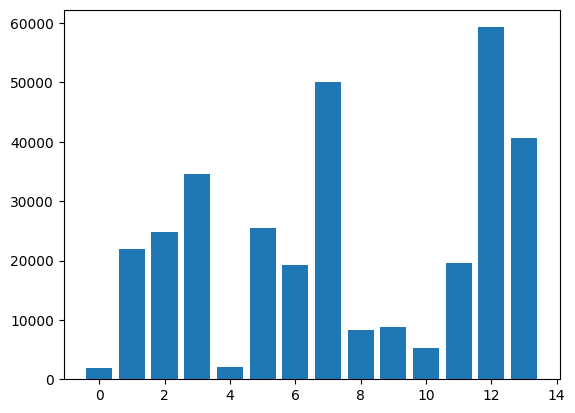

In [ ]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
data = df.values
# split into input and output elements
X, y = data[:, 1:-2], data[:, -1]

In [ ]:
X.shape

(321894, 21)

In [ ]:
X = preprocessing.normalize(X)

In [ ]:
np.mean(X)


0.05702840160750698

Class=2, n=59292 (7.143%)
Class=12, n=59292 (7.143%)
Class=5, n=59292 (7.143%)
Class=3, n=59292 (7.143%)
Class=7, n=59292 (7.143%)
Class=13, n=59292 (7.143%)
Class=11, n=59292 (7.143%)
Class=6, n=59292 (7.143%)
Class=10, n=59292 (7.143%)
Class=1, n=59292 (7.143%)
Class=8, n=59292 (7.143%)
Class=9, n=59292 (7.143%)
Class=4, n=59292 (7.143%)
Class=0, n=59292 (7.143%)


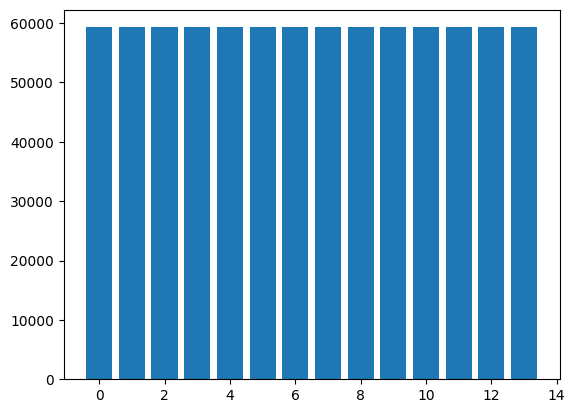

In [ ]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X.shape

(830088, 21)

In [ ]:
y.shape

(830088,)

In [ ]:
from tensorflow.keras.utils import to_categorical
X = X[:-88]
y= y[:-88]
print(f"Stacked sequences shape: {X.shape}, {y.shape}")

Stacked sequences shape: (830000, 21, 1), (830000,)


In [ ]:
# Split the array
sequences = np.array_split(X, 10000, axis=0)
X_sequences = np.stack(sequences)
# Verify the splits
print(f"Stacked sequences shape: {X_sequences.shape}")

Stacked sequences shape: (10000, 83, 21)


In [ ]:
# Split the array
sequences = np.array_split(y, 10000, axis=0)
y_sequences = np.stack(sequences)
mode_result = mode(y_sequences, axis=1)
y_labels = mode_result.mode.reshape(10000, 1)
y_labels = to_categorical(y_labels)
# Verify the splits
print(f"Stacked sequences shape: {y_labels.shape}")

Stacked sequences shape: (10000, 14)


In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
print(f"Stacked sequences shape: {X.shape}, {y.shape}")

Stacked sequences shape: (830000, 21, 1), (830000,)


In [ ]:
y_labels = to_categorical(y)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y_labels,random_state=104,test_size=0.2,shuffle=True)

In [ ]:
y_test.shape

(166000, 14)

In [ ]:
# Input Data

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = len(X_train[0])  # 128 timesteps per series
n_input = len(X_train[0][0])  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = 14 # Total classes (should go up, or should go down)

In [ ]:
learning_rate = 0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
batch_size = 1500
display_iter = 30000  # To show test set accuracy during training

In [ ]:
# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print(X_train.shape, y_train.shape)
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]


Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(166000, 21, 1) (166000, 14) 0.0573774034241044 0.2105395003208548
(664000, 21, 1) (664000, 14)
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Dropout
# convlstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
from keras.layers import Bidirectional
from matplotlib import pyplot

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 15, 64
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
 model.add(Dropout(0.5))
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [1]:
# fit and evaluate a model
def evaluate_bimodel(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 15, 64
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Bidirectional(LSTM(100, input_shape=(n_timesteps,n_features))))
 model.add(Dropout(0.5))
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [ ]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [ ]:
# run an experiment
def run_experiment(model,repeats=1):
 # repeat experiment
 scores = list()
 for r in range(repeats):
  if(model=='lstm'):
    score = evaluate_model(X_train, y_train, X_test, y_test)
  elif(model=="bilstm"):
    score = evaluate_bimodel(X_train, y_train, X_test, y_test)
  score = score * 100.0
  print('>#%d: %.3f' % (r+1, score))
  scores.append(score)
 # summarize results
 summarize_results(scores)

In [ ]:
# run the experiment
run_experiment('lstm')

>#1: 86.230
>#2: 85.746


KeyboardInterrupt: 

In [ ]:
# run the experiment
run_experiment('bilstm')

>#1: 91.836
>#2: 92.519


KeyboardInterrupt: 